In [1]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


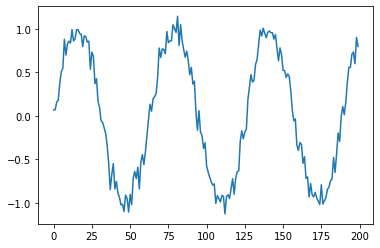

In [54]:
#make the original data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [55]:
###Build our dataset
#Let's see if we can use T past values to predict the next value
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y= series[t+T]
  Y.append(y)
print('Xs shape: '  + str(len(X)))
X=np.array(X).reshape(-1,T,1) #Now the data should be N x T x D #-1 means unknown count of row. Burada 190 yerine geçiyor. -1 demek o kısma dokunma demek.
Y=np.array(Y)
N= len(X)
print(X.shape)
print('\n First element of X: \n' +  str(X[0]))

Xs shape: 190
(190, 10, 1)

 First element of X: 
[[0.06855249]
 [0.07170514]
 [0.15849374]
 [0.18074601]
 [0.3754527 ]
 [0.50915364]
 [0.54899774]
 [0.8813273 ]
 [0.69888244]
 [0.82599876]]


In [68]:
###Try Autoregressive RNN model:
i = Input(shape =(T, 1))
x = SimpleRNN(5) (i)
x= Dense(1)(x)
model= Model(i,x)
model.compile(
    loss='mse',
    optimizer= Adam(lr= 0.1),
)

#train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs= 80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 58ms/step - loss: 0.5930 - val_loss: 0.1710
Epoch 2/80
3/3 [==============================] - 0s 9ms/step - loss: 0.1650 - val_loss: 0.2440
Epoch 3/80
3/3 [==============================] - 0s 8ms/step - loss: 0.2114 - val_loss: 0.0914
Epoch 4/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0880 - val_loss: 0.1010
Epoch 5/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0827 - val_loss: 0.0427
Epoch 6/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0524 - val_loss: 0.0790
Epoch 7/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0634 - val_loss: 0.0314
Epoch 8/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0310 - val_loss: 0.0325
Epoch 9/80
3/3 [==============================] - 0s 8ms/step - loss: 0.0455 - val_loss: 0.0230
Epoch 10/80
3/3 [==============================] - 0s 9ms/step - loss: 0.0251 - val_loss: 0.0336
Epoch 11/80
3/3 [=====================

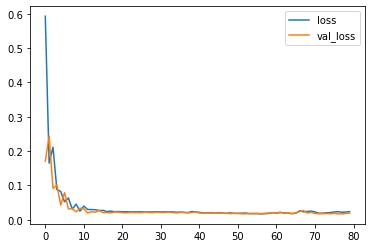

In [69]:
#Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [70]:
#'Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predicitons = []

#index of first validation input
i= -N//2

while len(validation_predicitons) < len(validation_target):
  p= model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array -> scalar
  i +=1

  #update the prediction list
  validation_predicitons.append(p)

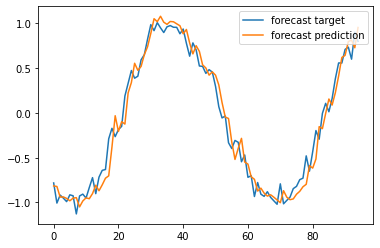

In [71]:
plt.plot(validation_target, label= 'forecast target')
plt.plot(validation_predicitons, label= 'forecast prediction')
plt.legend()

#This looks perfectly correct but this was the wrong way to do it. When we add noise
#We will see how it diverges.

In [72]:
#Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predicitons = []

#last train input
last_x = X[-N//2] #1-D array of length T

while len(validation_predicitons) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] #1x1 array -> scalar

  #update the predictions list
  validation_predicitons.append(p)

  #make the new input
  last_x = np.roll(last_x, -1) #roll function shifts all values to left with 1 index. So now we will add over new data to the end of our last_x
  last_x[-1] = p

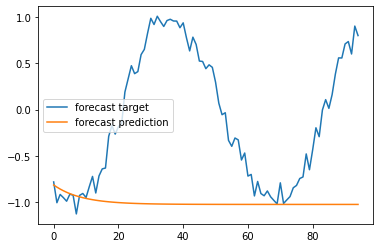

In [73]:
plt.plot(validation_target, label= 'forecast target')
plt.plot(validation_predicitons, label= 'forecast prediction')
plt.legend()

#Now with correct prediction we got better predictions.